# **2. Latihan Train Test Split Data**

**Yang di contoh**:

In [ ]:
from sklearn.model_selection import train_test_split

x_data = range(10)
y_data = range(10)

print("Jika random_state = 42")
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)
for i in range(3):
  print(y_test)

print("Jika random_state = None")
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = None)
for i in range(3):
  print(y_test)


Jika random_state = 42
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
Jika random_state = None
[1, 8, 6]
[1, 8, 6]
[1, 8, 6]


**Yang di latihan** : Klasifikasi bunga iris apakah termasuk Setosa, Versicolour, Virginica, dari iris dataset berdasarkan panjang & lebar sepal, serta panjang & lebar petal.


In [ ]:
import sklearn
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data #atribut iris dataset (sepal length, sepal width, petal length, petal width)
y = iris.target #Klasifikasi iris setosa, versicolour, virginica

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#hitung jumlah data x_test
print(len(x_test))
print("Jumlah x_test adalah 30 sampel dari 150 populasi. Sudah memenuhi proporsi test_size = 0.2. Siap diolah untuk pelatihan model machine learning!")



30
Jumlah x_test adalah 30 sampel dari 150 populasi. Sudah memenuhi proporsi test_size = 0.2. Siap diolah untuk pelatihan model machine learning!


# **3. Latihan SKLearn Cross Valdiation Split**

In [ ]:
import sklearn
from sklearn import datasets

#Load Iris Dataset
iris = datasets.load_iris()
x = iris.data #Atribut/karakter sampel uji
y = iris.target #target klasifikasi

#membuat model decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

Elemen pertama dari larik menunjukkan nilai 0.96666 yang berarti ketika fold pertama dijadikan validation set dan fold lainnya dijadikan train set, hasil dari pengujian tersebut adalah akurasi sebesar 0.96666. 

Melihat akurasi dari seluruh pengujian fold yang memiliki nilai tinggi dan konsisten pada tiap fold, kita mendapatkan gambaran bahwa model kita memiliki performa yang sangat baik.

Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik. **Nilai cross validation disini sama dengan R square.**

# **4. Latihan Decision Tree**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

#Read iris dataframe
iris = pd.read_csv("/content/Iris.csv")

#Kemudian hapus kolom Id
iris.drop(columns="Id", axis=1, inplace=True)

#Tentukan atribut dan label
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = iris["Species"]

#train model decision tree dengan fungsi fit()
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x, y)

#prediksi model iris with SepalLength = 6.2, SepalWidth = 3.4, PetalLength = 5.4, PetalWidth = 2.3
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Visualisasi Decision Tree Dengan Library Graphviz**

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model, 
    out_file = "iris_tree.dot", 
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded = True, 
    filled = True
)

Setelah itu download file iris_tree.dot yang ada di direktori di menu bar samping kiri, lalu convert as png di https://onlineconvertfree.com/complete/dot-png/ untuk lihat gambarnya

# **5. Latihan Linear Regression**

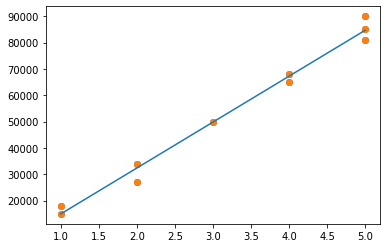

In [ ]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 5])

#data harga rumah asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

#buat scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(bedrooms, house_price)

#Latih model dengan regression fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

# **Lathan Logistic Regression**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Social_Network_Ads.csv")


#cek bahwa nilai seluruh dataframe sudah lengkap & tidak ada missing values
df.info()
print("alhamdulillah, gaada missing value guys")

#hilangkan kolom UserId
df.drop(columns = "User ID", axis = 1, inplace = True)
df2 = pd.get_dummies(data = df)

#Pisahkan atribut(x) dan label(y)
x = df2[["Age", "EstimatedSalary", "Gender_Male", "Gender_Female"]]
y = df2["Purchased"]

#Normalisasi data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)

#Split data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 1)
#NOTE : yang displit adalah scaled_data (x yang sudah dinormalisasi) dengan y

#Train model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #model sebagai sebuah objek logistic regression
model.fit(x_train, y_train)

#Uji akurasi dengan fungsi score() pada model
print("akurasi model reglog : ")
from sklearn.preprocessing import StandardScaler
model.score(x_test, y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
alhamdulillah, gaada missing value guys
akurasi model reglog : 


0.825

# **6. Latihan Clustering K-Means**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


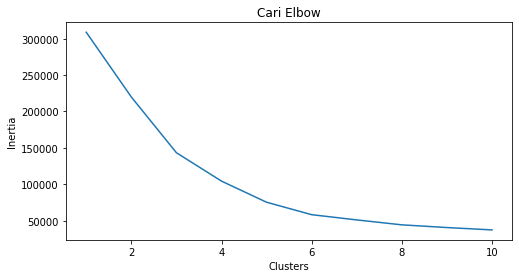

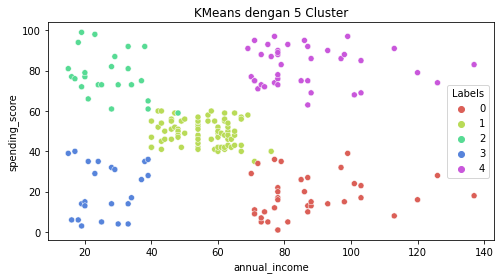

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Mall_Customers.csv")

#ganti nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#ganti variabel kategorik di gender dengan variabel numerik
df["gender"].replace(["Female", "Male"], [0, 1], inplace = True)

#hilangkan kolom customer ID dan gender
x = df.drop(columns=["CustomerID", "gender"], axis=1)
df.head()

#import KMeans dengan nilai inertia dari nilai K dari 1 sampai 11
#FYI inertia itu jumlah dari seluruh kuadrat jarak sampel2nya ke pusat kluster terdekat
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters = i).fit(x) #compute K-Means clustering
  clusters.append(km.inertia_)

#buat plot
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x=list(range(1, 11)), y = clusters, ax = ax)
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.set_title("Cari Elbow")

#Didapat K nya adalah 5. KMeans dilatih kembali dengan K = 5
km5 = KMeans(n_clusters = 5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

# **7. Latihan PCA dengan library SKLearn**

In [ ]:
#Import Dataset Iris

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#Gunakan model Decision Tree untuk lihat akurasi tanpa PCA
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_test, y_test)

#Kemudian gunakan model PCA untuk melihat variance dari setiap atribut
from sklearn.decomposition import PCA

#Membuat PCA dengan 4 principal component karena Iris dataset punya 4 atribut (SepalWidth, SepalLength, PetalWidth, PetalLength)
pca = PCA(n_components = 4)

#Mengaplikasikan PCA pada dataset x_train, keluarannya adalah x_train baru yang sudah di apply dimensionality reduction
pca_attributes = pca.fit_transform(x_train)

#cek variance dari setiap atrribute
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.928 + 0.047 = 0.975 yang sudah cukup tinggi. Lalu train lagi PCA dengan 2 principal component.

In [ ]:
#PCA dengan 2 komponen utama
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2)
x_train_pca = pca2.fit_transform(x_train)
x_test_pca = pca2.fit_transform(x_test)

#Uji model PCA x_train_pca (terbaru karena sudah di transform) & y_train dengan classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
model2 = decision_tree.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)


0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.

# **8. Latihan SKLearn SVM (Support Vector Machine)**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")

#memisahkan atribut pada dataset dan menyimpan dalam sebuat variabel
#keterangan: atribut x = 8, y = 1 (kolom "Outcome", penentu diabetes/tidaknya)
x = df[df.columns[:8]]
y = df['Outcome']


#menyamakan nilai kolom Glucose & DiabetesPedigreeFunction dengan standarisasi StandardCaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

#pisahkan data train dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Buat objek SVM lalu panggil fungsi fit untuk melatih model
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

#menampilkan score akurasi
clf.score(x_test, y_test)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **9. Latihan SVM Support Vector Regression**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


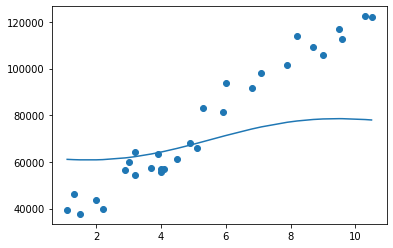

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Salary_Data.csv")
x = df["YearsExperience"]
y = df["Salary"]

#Ubah bentuk atribut
import numpy as np
x = x[:, np.newaxis]

#Membangun model dengan parameter C, gamma, dan kernel
from sklearn.svm import SVR
model = SVR(C = 1000, gamma = 0.05, kernel = "rbf")

#melatih model dengan fungsi fit()
model.fit(x, y)

#Buat scatter plot untuk liat model SVR
import matplotlib.pyplot as plt

#Visualisasi model
plt.scatter(x, y)
plt.plot(x, model.predict(x))

Model belum dapat menyesuaikan data dengan baik. Maka akan diuji beberapa nilai parameter bersamaan dengan teknik Grid Search

# **10. Latihan SKLearn Teknik Grid Search**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


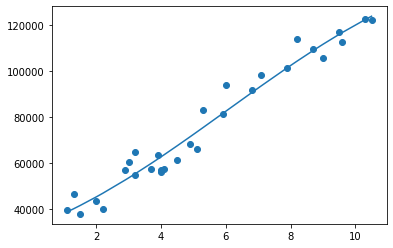

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Salary_Data.csv")
x = df["YearsExperience"]
y = df["Salary"]

#ubah bentuk dimensi array dari atribut
import numpy as np
x = x[:,np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {"kernel" : ["rbf"], "C" : [1000, 10000, 100000], "gamma" : [0.5, 0.05, 0.005]}
grid_search = GridSearchCV(model, parameters)

#latih model dengan fungsi fit
grid_search.fit(x, y)
grid_search.best_params_

#Membuat model SVM baru dengan parameter terbaik keluaran gridsearch, yaitu C : 100000, gamma : 0.005, kernel : "rbf"
model_baru = SVR(C = 100000, gamma = 0.005, kernel = "rbf")
model_baru.fit(x, y)

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model_baru.predict(x))